In [73]:
#Import basic libraries
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from statsmodels.graphics import tsaplots
import seaborn as sbn
import matplotlib.pyplot as pyplot
from statsmodels.tsa.ar_model import AutoReg
import sklearn.linear_model as lm

In [37]:
#Read treasury yield history
yield_hist = pd.read_csv('TreasuryYield.csv')

In [38]:
yield_hist.sample(n=5)

,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
158,2/9/2024,5.49,5.51,5.44,5.43,5.26,4.86,4.48,4.25,4.14,4.17,4.17,4.48,4.37
76,10/12/2023,5.61,5.59,5.63,5.63,5.58,5.43,5.06,4.82,4.69,4.73,4.70,5.05,4.86
119,12/13/2023,5.52,5.52,5.44,5.45,5.33,4.94,4.46,4.18,4.00,4.04,4.04,4.36,4.19
173,3/4/2024,5.51,5.49,5.48,5.42,5.37,4.98,4.61,4.39,4.21,4.23,4.22,4.48,4.36
72,10/5/2023,5.57,5.59,5.61,5.62,5.56,5.39,5.03,4.82,4.68,4.73,4.72,5.06,4.89


In [39]:
yield_hist['Date']=pd.to_datetime(yield_hist['Date'])

In [40]:
yield_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    255 non-null    datetime64[ns]
 1   1 Mo    255 non-null    float64       
 2   2 Mo    255 non-null    float64       
 3   3 Mo    255 non-null    float64       
 4   4 Mo    255 non-null    float64       
 5   6 Mo    255 non-null    float64       
 6   1 Yr    255 non-null    float64       
 7   2 Yr    255 non-null    float64       
 8   3 Yr    255 non-null    float64       
 9   5 Yr    255 non-null    float64       
 10  7 Yr    255 non-null    float64       
 11  10 Yr   255 non-null    float64       
 12  20 Yr   255 non-null    float64       
 13  30 Yr   255 non-null    float64       
dtypes: datetime64[ns](1), float64(13)
memory usage: 28.0 KB


In [41]:
yield_hist_returns=yield_hist.iloc[:,1:].diff()

In [42]:
yield_hist_returns = yield_hist_returns.dropna()

In [43]:
#Call PCA functions on the yield data
pca_obj=PCA(n_components=3)

In [44]:
pca_obj.fit(yield_hist_returns)

PCA(n_components=3)

In [45]:
pca_obj.explained_variance_ratio_.sum()

0.9543027973344773

In [46]:
yield_pca_comps=pca_obj.components_

In [47]:
yield_pca_comps[1]

array([-0.03131454,  0.01042115,  0.05160515,  0.04987028,  0.13521177,
        0.33096971,  0.4874204 ,  0.32068756,  0.12626092, -0.06183376,
       -0.242681  , -0.44662069, -0.49738214])

In [48]:
yield_pca_comps[0]

array([-0.01649157, -0.0111587 , -0.03151557, -0.04106652, -0.08391083,
       -0.19218836, -0.34203908, -0.38967236, -0.4080812 , -0.40809164,
       -0.37662017, -0.33142464, -0.31520953])

In [49]:
yield_hist_returns.head()

,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
1,0.00,0.01,0.09,0.00,0.04,0.02,-0.06,-0.02,-0.03,-0.03,-0.02,0.00,0.01
2,0.00,0.00,-0.06,0.00,0.01,0.06,0.09,0.08,0.06,0.05,0.05,0.02,0.01
3,0.00,0.01,0.00,0.05,0.01,-0.01,-0.03,-0.06,-0.05,-0.07,-0.06,-0.03,-0.03
4,0.08,0.08,0.02,0.02,0.03,0.09,0.16,0.17,0.17,0.16,0.14,0.11,0.11
5,-0.01,-0.01,-0.03,-0.01,-0.03,-0.01,0.00,0.00,-0.01,-0.02,-0.04,-0.05,-0.07


In [96]:
#Construct time-series for first 3 PCs
first_pca_ts=yield_pca_comps[0]*yield_hist_returns
second_pca_ts=yield_pca_comps[1]*yield_hist_returns
third_pca_ts=yield_pca_comps[2]*yield_hist_returns

In [97]:
first_pca_ts.head()

,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
1,-0.000000,-0.000112,-0.002836,-0.000000,-0.003356,-0.003844,0.020522,0.007793,0.012242,0.012243,0.007532,-0.000000,-0.003152
2,-0.000000,-0.000000,0.001891,-0.000000,-0.000839,-0.011531,-0.030784,-0.031174,-0.024485,-0.020405,-0.018831,-0.006628,-0.003152
3,-0.000000,-0.000112,-0.000000,-0.002053,-0.000839,0.001922,0.010261,0.023380,0.020404,0.028566,0.022597,0.009943,0.009456
4,-0.001319,-0.000893,-0.000630,-0.000821,-0.002517,-0.017297,-0.054726,-0.066244,-0.069374,-0.065295,-0.052727,-0.036457,-0.034673
5,0.000165,0.000112,0.000945,0.000411,0.002517,0.001922,-0.000000,-0.000000,0.004081,0.008162,0.015065,0.016571,0.022065


In [98]:
first_pca_ts=first_pca_ts.sum(axis=1)
second_pca_ts=second_pca_ts.sum(axis=1)
third_pca_ts=third_pca_ts.sum(axis=1)

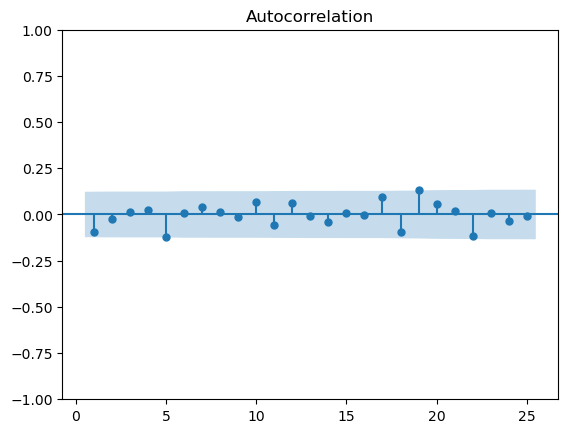

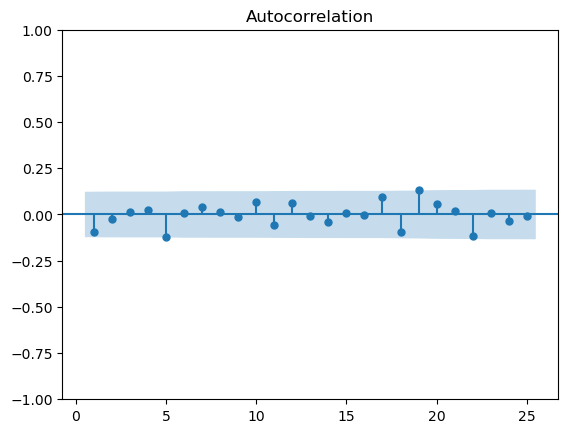

In [99]:
#EDA for yield time-series
tsaplots.plot_acf(first_pca_ts,zero=False)

In [101]:
#Construct numpy arrays for few yields by maturity
ts_first_PCA = np.array(first_pca_ts)
ts_second_PCA = np.array(second_pca_ts)
ts_third_PCA = np.array(third_pca_ts)


<Axes: >

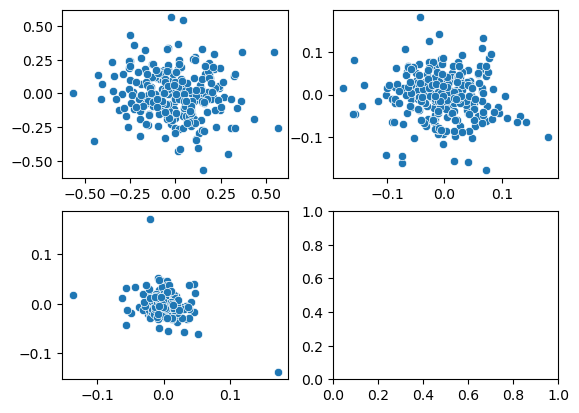

In [102]:
fig, ((ax1, ax2), (ax3, ax4)) = pyplot.subplots(nrows=2, ncols=2)
sbn.scatterplot(x=ts_first_PCA[:-1], y=ts_first_PCA[1:], ax=ax1)
sbn.scatterplot(x=ts_second_PCA[:-1], y=ts_second_PCA[1:], ax=ax2)
sbn.scatterplot(x=ts_third_PCA[:-1], y=ts_third_PCA[1:], ax=ax3)


The above plot shows that yield returns do not exhibit homoskedacity. We can try using AR(1) model to predict and simulate yield returns

In [108]:
ts_first_PCA.shape

(254,)

In [109]:
ts_first_PCA=ts_first_PCA.reshape(254,1)
ts_second_PCA=ts_second_PCA.reshape(254,1)
ts_third_PCA=ts_third_PCA.reshape(254,1)

In [110]:
#Fit Linear Regression on 3 PCAs
lmModel=lm.LinearRegression()
X1=ts_first_PCA[:-1]
y1=ts_first_PCA[1:]
print(X1.shape)
print(y.shape)
lmModel.fit(X=X1, y=y1)

(253, 1)
(253,)


LinearRegression()

In [111]:
lmModel.intercept_, lmModel.coef_

(array([-0.00456218]), array([[-0.09530229]]))

In [112]:
#Generate residuals
residuals1=y1-lmModel.intercept_-(lmModel.coef_)*X1

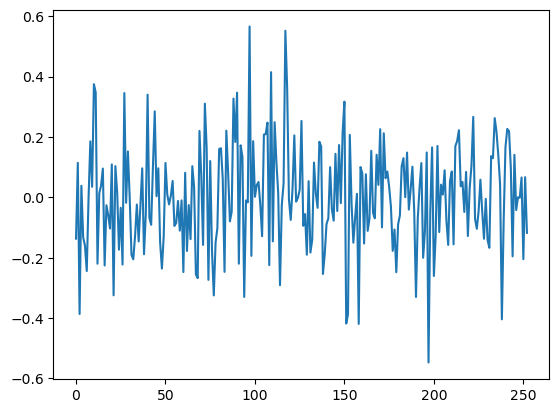

In [113]:
pyplot.plot(residuals1)

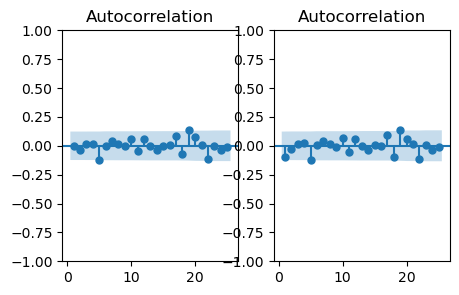

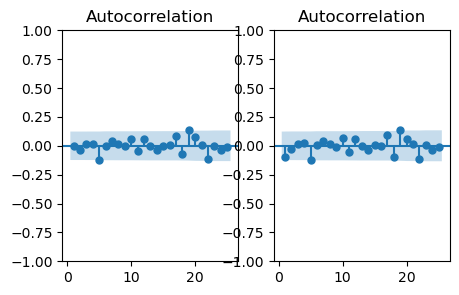

In [122]:
fig, (ax1, ax2) = pyplot.subplots(ncols=2, figsize=(5,3))
tsaplots.plot_acf(residuals1, zero=False, ax=ax1)
tsaplots.plot_acf(ts_first_PCA , zero=False, ax=ax2)

In [123]:
X2=ts_second_PCA[:-1]
y2=ts_second_PCA[1:]
lmModel.fit(X=X2, y=y2)
lmModel.intercept_, lmModel.coef_

(array([-0.00309419]), array([[-0.08111651]]))

In [124]:
#Generate residuals
residuals2=y2-lmModel.intercept_-(lmModel.coef_)*X2

In [125]:
X3=ts_third_PCA[:-1]
y3=ts_third_PCA[1:]
lmModel.fit(X=X3, y=y3)
lmModel.intercept_, lmModel.coef_
#Generate residuals
residuals3=y3-lmModel.intercept_-(lmModel.coef_)*X3